# Question 1



In [92]:
# import library
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Define McCulloch-Pitts:
class McCulloch_Pitts_neuron:

    def __init__(self, weights, threshold):
        self.weights = weights  # define weights
        self.threshold = threshold  # define threshold

    def model(self, x):
        # define model with threshold
        if self.weights @ x >= self.threshold:
            return 1
        else:
            return 0

In [94]:
# Define McCulloch-Pitts with ReLU:
class McCulloch_Pitts_neuron_ReLU:

    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, x):
        # Compute weighted sum
        weighted_sum = self.weights @ x
        # Apply ReLU activation
        return max(0, weighted_sum - self.threshold)

In [95]:
# Define McCulloch-Pitts with Sigmoid:
class McCulloch_Pitts_neuron_Sigmoid:

    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, x):
        # Compute weighted sum
        weighted_sum = self.weights @ x
        # Apply Sigmoid activation
        return 1 / (1 + np.exp(-(weighted_sum - self.threshold)))

In [96]:
# define model for dataset
def Area(x, y):
    neur1 = McCulloch_Pitts_neuron([0, 1], 0)
    neur2 = McCulloch_Pitts_neuron([2, -1], 2)
    neur3 = McCulloch_Pitts_neuron([-2, -1], -6)
    neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))

    # 3 bit output
    # return str(z1) + str(z2)
    return list([z4])


def Area_ReLU(x, y):
    neur1 = McCulloch_Pitts_neuron([0, 1], 0)
    neur2 = McCulloch_Pitts_neuron([2, -1], 2)
    neur3 = McCulloch_Pitts_neuron([-2, -1], -6)
    neur4 = McCulloch_Pitts_neuron_ReLU([1, 1, 1], 2.99999)

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))

    return list([z4])


def Area_Sigmoid(x, y):
    neur1 = McCulloch_Pitts_neuron([0, 1], 0)
    neur2 = McCulloch_Pitts_neuron([2, -1], 2)
    neur3 = McCulloch_Pitts_neuron([-2, -1], -6)
    neur4 = McCulloch_Pitts_neuron_Sigmoid([1, 1, 1], 3)

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))

    return list([z4])

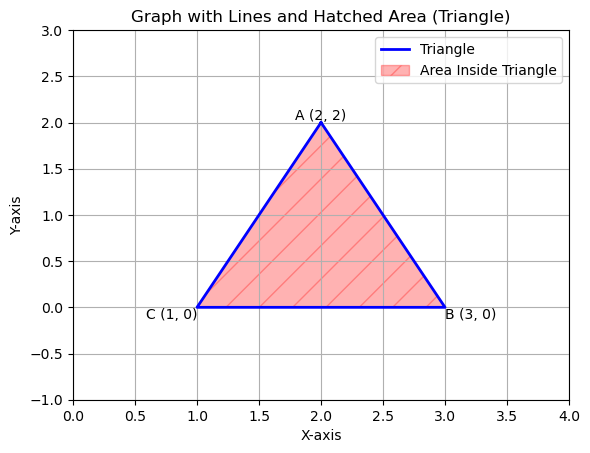

In [97]:
# Coordinates of the triangle vertices
x = [2, 3, 1, 2]  # Closing the triangle by repeating the first point
y = [2, 0, 0, 2]

# Plot the triangle
plt.plot(x, y, color="blue", label="Triangle", linewidth=2)

# Fill the area inside the triangle with hatching
plt.fill(x, y, color="red", alpha=0.3, hatch="/", label="Area Inside Triangle")

# Adding text labels for the vertices
plt.text(2, 2, "A (2, 2)", fontsize=10, ha="center", va="bottom")
plt.text(3, 0, "B (3, 0)", fontsize=10, ha="left", va="top")
plt.text(1, 0, "C (1, 0)", fontsize=10, ha="right", va="top")

# Adding grid, legend, and labels
plt.grid(True)
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Graph with Lines and Hatched Area (Triangle)")

# Setting the x and y axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Save plot as PNG
plt.savefig("a.png", bbox_inches="tight")

# Show the plot
plt.show()

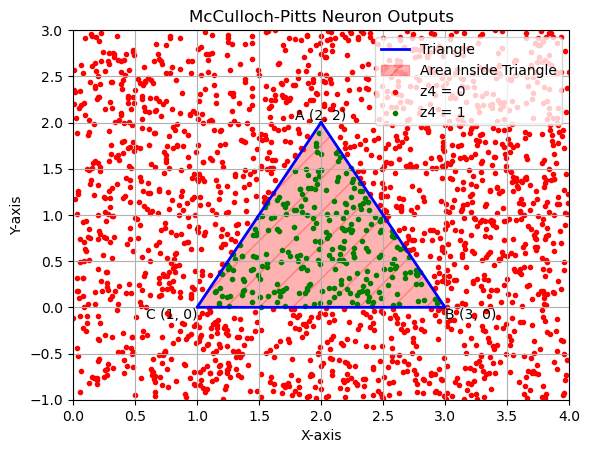

In [98]:
# Generate random data points
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits

# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:  # z5 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z5 value is 1
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

x = [2, 3, 1, 2]
y = [2, 0, 0, 2]

# Plot the triangle
plt.plot(x, y, color="blue", label="Triangle", linewidth=2)

# Fill the area inside the triangle with hatching
plt.fill(x, y, color="red", alpha=0.3, hatch="/", label="Area Inside Triangle")

# Adding text labels for the vertices
plt.text(2, 2, "A (2, 2)", fontsize=10, ha="center", va="bottom")
plt.text(3, 0, "B (3, 0)", fontsize=10, ha="left", va="top")
plt.text(1, 0, "C (1, 0)", fontsize=10, ha="right", va="top")
plt.scatter(red_x, red_y, color="red", label="z4 = 0", marker=".")
plt.scatter(green_x, green_y, color="green", label="z4 = 1", marker=".")

# Adding grid, legend, and labels
plt.grid(True)
plt.legend(loc="upper right")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("McCulloch-Pitts Neuron Outputs")

# Setting the x and y axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Save plot as PNG
plt.savefig("c.png", bbox_inches="tight")

# Show the plot
plt.show()

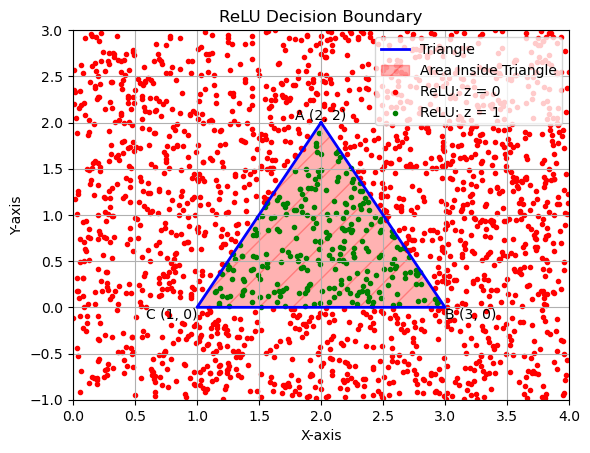

In [99]:
# Evaluate data points using Area_ReLU
relu_red_points = []
relu_green_points = []

for i in range(num_points):
    z_value = Area_ReLU(x_values[i], y_values[i])
    if z_value[0] <= 0: 
        relu_red_points.append((x_values[i], y_values[i]))
    else:
        relu_green_points.append((x_values[i], y_values[i]))


# Plot ReLU
relu_red_x, relu_red_y = zip(*relu_red_points)
relu_green_x, relu_green_y = zip(*relu_green_points)
# Coordinates of the triangle vertices
x = [2, 3, 1, 2]  # Closing the triangle by repeating the first point
y = [2, 0, 0, 2]

# Plot the triangle
plt.plot(x, y, color="blue", label="Triangle", linewidth=2)

# Fill the area inside the triangle with hatching
plt.fill(x, y, color="red", alpha=0.3, hatch="/", label="Area Inside Triangle")

# Adding text labels for the vertices
plt.text(2, 2, "A (2, 2)", fontsize=10, ha="center", va="bottom")
plt.text(3, 0, "B (3, 0)", fontsize=10, ha="left", va="top")
plt.text(1, 0, "C (1, 0)", fontsize=10, ha="right", va="top")

# Adding grid, legend, and labels
plt.grid(True)
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Setting the x and y axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

plt.scatter(relu_red_x, relu_red_y, color="red", label="ReLU: z = 0", marker=".")
plt.scatter(relu_green_x, relu_green_y, color="green", label="ReLU: z = 1", marker=".")
plt.title("ReLU Decision Boundary")
plt.legend(loc="upper right")
plt.show()

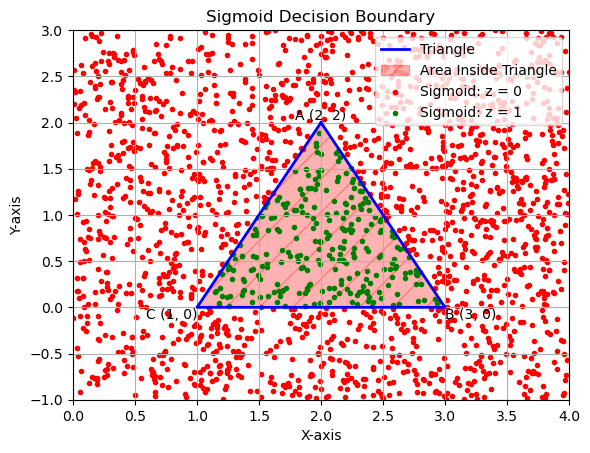

In [100]:
# # Evaluate data points using Area_Sigmoid
sigmoid_red_points = []
sigmoid_green_points = []

for i in range(num_points):
    z_value = Area_Sigmoid(x_values[i], y_values[i])
    if z_value[0] < 0.72:  # Treat values below 0.5 as "0"
        sigmoid_red_points.append((x_values[i], y_values[i]))
    else:
        sigmoid_green_points.append((x_values[i], y_values[i]))
# Generate random data points
# Initialize lists to store data points for different z5 values
# Separate x and y values for red and green points
# red_x, red_y = zip(*red_points)
sigmoid_red_x, sigmoid_red_y= zip(*red_points)
# green_x, green_y = zip(*green_points)
sigmoid_green_x, sigmoid_green_y = zip(*green_points)

# Coordinates of the triangle vertices
x = [2, 3, 1, 2]
y = [2, 0, 0, 2]

# Plot the triangle
plt.plot(x, y, color="blue", label="Triangle", linewidth=2)

# Fill the area inside the triangle with hatching
plt.fill(x, y, color="red", alpha=0.3, hatch="/", label="Area Inside Triangle")

# Adding text labels for the vertices
plt.text(2, 2, "A (2, 2)", fontsize=10, ha="center", va="bottom")
plt.text(3, 0, "B (3, 0)", fontsize=10, ha="left", va="top")
plt.text(1, 0, "C (1, 0)", fontsize=10, ha="right", va="top")

# Adding grid, legend, and labels
plt.grid(True)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Setting the x and y axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)


# Plot Sigmoid

plt.scatter(sigmoid_red_x, sigmoid_red_y, color="red", label="Sigmoid: z = 0", marker=".")
plt.scatter(sigmoid_green_x, sigmoid_green_y, color="green", label="Sigmoid: z = 1", marker=".")
plt.title("Sigmoid Decision Boundary")
plt.legend(loc="upper right")
plt.show()
# plt.scatter(x_values, points, color="blue")
